# Hard Mode

Analysis by [Vincent Tjeng](https://vtjeng.com)

[Wordle](https://www.powerlanguage.co.uk/wordle/) has a game mode known as "hard mode", in which any guess must be consistent with the hints provided from previous guesses. While it can take more turns for _humans_ to solve Wordle in hard mode, it's actually more straightforward for a _computer_ to generate a solution for Wordle (and prove that it is optimal) via brute force in hard mode, since the pool of guesses allowed diminishes rapidly after a few turns

In [1]:
using Statistics
include("utils.jl");
ProgressMeter.ijulia_behavior(:clear);

Unable to init server: Could not connect: Connection refused
Unable to init server: Could not connect: Connection refused

(.:6951): Gdk-CRITICAL **: 17:39:36.511: gdk_cursor_new_for_display: assertion 'GDK_IS_DISPLAY (display)' failed

(.:6951): Gdk-CRITICAL **: 17:39:36.516: gdk_cursor_new_for_display: assertion 'GDK_IS_DISPLAY (display)' failed


In [2]:
cache_word_scores(SOLUTION_WORDS, SOLUTION_WORDS)

  2.242629 seconds (29.79 M allocations: 2.520 GiB, 18.16% gc time, 0.19% compilation time)


# Algorithm

The `get_optimal_strategy_exhaustive` function searches for the optimal strategy for Wordle in hard mode given a limited `turns_budget`. It either returns FAIL (if no strategy satisfying the `turns_budget` exists) or returns a strategy with the best worst-case number of turns (ties are broken by the average number of turns).

## Concepts
- We think of each guess as "splitting" the solution pool into one or more "shards". (A "shard" contains all of the words in the solution pool that would have returned the same response to the guess; the shards cover the solution pool but don't overlap). 
- For a particular solution pool, a strategy satisfying `turns_budget` exists if and only if there exists an initial guess that splits the solution pool into shards, where _each_ shard has a strategy that succeeds in at most `turns_budget - 1` turns.

## Optimizations
A naive algorithm tries every possible combination of guesses. We implement the following optimizations:

- We reduce `turns_budget` to the worst-case number of turns seen so far.
- For a given first guess, we try to find a successful strategy for the shards in decreasing order of size. We are more likely to fail to find a strategy for larger shards; if we do fail, we can short-circuit the computation and return FAIL for that first guess (and continue trying other guesses).
- When left with a budget of 1 turn and a solution pool that contains 2 or more words, we return FAIL.

### Considered but Unimplemented
- Since only 243-5=238 distinct responses are possible (three possibilities for hints for each letter, less the 5 combinations of exactly 1 yellow and 4 greens), we could return FAIL when left with a budget of 2 turns and a solution pool containing 239 or more words. _Implemented, but did not have a significant performance impact._
- We are currently trying the words in the order they were found in the word list. Sorting them by a heuristic might allow us to reduce `turns_budget` more quickly and stop trying guesses in less promising situations

# Hard mode, only guessing words that can be solutions, `turns_budget` = 4

No strategy exists given a budget of 4.

In [3]:
r = get_optimal_strategy_exhaustive(
    SOLUTION_WORD_IDXS, 
    SOLUTION_WORD_IDXS, 
    hard_mode=true, 
    turns_budget=4,
    show_progress=true
)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:05
  best_guess:              N/A
  best_max_num_turns:      N/A
  best_average_num_turns:  N/A
  num_skipped:             2314
  valid_guesses:           Tuple{String, Float64, Float64}[]


# Hard mode, only guessing words that can be solutions, `turns_budget` = 5

Two initial guesses succeed with a budget of 5: "scowl" and "stamp". Excitingly, a brute-force search trying all guesses takes only 3 minutes!

In [7]:
r = get_optimal_strategy_exhaustive(
    SOLUTION_WORD_IDXS, 
    SOLUTION_WORD_IDXS, 
    hard_mode=true, 
    turns_budget=5,
    show_progress=true
)
num_turns, guess, strat = r;

Progress: 100%|█████████████████████████████████████████| Time: 0:03:14
  best_guess:              scamp
  best_max_num_turns:      5
  best_average_num_turns:  3.7161987041036717
  num_skipped:             2312
  valid_guesses:           [("scowl", 5.0, 3.752915766738661), ("scamp", 5.0, 3.7161987041036717)]


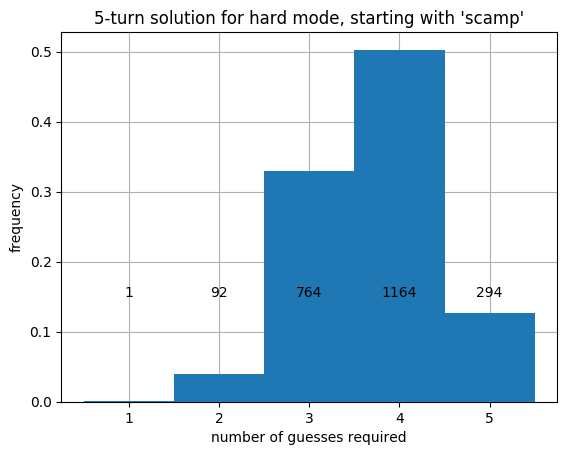

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /home/vtjeng/.julia/packages/PyCall/L0fLP/src/numpy.jl:67


In [5]:
plot_num_turns(num_turns, title_text="5-turn solution for hard mode, starting with 'scamp'")

In [6]:
print_strategy(guess, strat)

scamp
 01022
  crimp
   22022
    crump
   20022
    chump
     20222
      clump
 11002
  crisp
 01010
  mince
   20021
    mercy
   11010
    comic
   22010
    mimic
     22001
      micro
   10011
    comet
   20220
    munch
   10010
    comfy
   10012
    emcee
   20020
    mulch
   21011
    medic
   20010
    mucky
   11110
    cumin
 22200
  scare
   22200
    scald
     22200
      scant
     22220
      scaly
   22220
    scarf
     22220
      scary
   22202
    scale
 11100
  basic
   02101
    cause
   02201
    caste
   01101
    ascot
 00020
  grime
   01022
    rhyme
   01020
    roomy
   00021
    enemy
   00120
    filmy
   20022
    gnome
   20020
    gummy
   22220
    grimy
   00020
    mummy
     01020
      thumb
     02222
      dummy
   00022
    theme
     22022
      thyme
     00022
      flume
     00122
      femme
   00122
    biome
 01200
  chart
   20200
    clack
     22200
      clang
     22202
      clank
   20211
    crate
   22200
    chaff
     

      sorry
     20220
      shirk
     22020
      sword
   20110
    serve
     22200
      serif
     22111
      sever
     21200
      surer
       20220
        shrew
     21100
      sower
       22022
        sober
       20022
        skier
     20202
      surge
     22101
      sewer
   21200
    sweet
     20222
      sleet
       20222
        sheet
   20001
    slung
     22022
      sling
     20120
      sunny
     20122
      suing
     20222
      swung
     22020
      slink
     20220
      sound
       20220
        skunk
     20022
      swing
     20020
      shiny
     22220
      slunk
     20010
      synod
       20100
        sniff
       21110
        snowy
     20210
      snuff
   22202
    stein
   20010
    shrub
     22220
      shrug
     20210
      surly
   22101
    stone
   20210
    sheer
 01110
  macho
   22200
    macaw
   11100
    cream
   21200
    mecca
   12102
    cameo
   22202
    macro
   21221
    mocha
   12100
    camel
   22100
   

     21212
      resin
     20220
      reset
     12220
      wiser
     10120
      ester
   20020
    hussy
   02022
    loose
     22022
      louse
     02022
      noise
     02222
      goose
       02222
        noose
   22022
    house
   02011
    nosey
   01221
    verso
   00110
    rusty
     20202
      risky
   02210
    torus
   02120
    roost
   01110
    visor
   10010
    bushy
     00222
      fishy
   00021
    guest
     22220
      guess
     00220
      bless
     00122
      exist
     02222
      quest
   02122
    rouse
   00222
    verse
     00222
      nurse
     02222
      terse
   10020
    blush
     00021
      whisk
     02222
      flush
   01120
    dross
     02220
      frost
     02222
      gross
   11022
    those
     02222
      whose
   20021
    heist
   00121
    wrest
     02220
      dress
   01011
    onset
   22020
    hoist
   10111
    usher
   02010
    bonus
   00210
    virus
   10021
    flesh
     01122
      welsh
   02220
  

      grief
       02222
        brief
     11010
      defer
   20200
    frown
     22200
      froze
     21200
      fjord
     22201
      frond
   00201
    thorn
     21200
      tooth
     11200
      booth
     10200
      booty
     11210
      broth
     22201
      thong
     20210
      trove
     10210
      wrote
   00000
    deign
     11120
      ridge
     02001
      renew
       12121
        newer
       12110
        nerve
       12120
        never
     02020
      verge
     01012
      green
     12001
      needy
       22022
        nerdy
     02111
      genie
     01200
      bribe
     11100
      wider
       02222
        rider
     12200
      weird
     10100
      vivid
       02001
        biddy
     02100
      eerie
     02000
      jerky
       02200
        verve
       02202
        berry
     21200
      drier
       22220
        dried
       22210
        drive
     10101
      windy
     02011
      genre
     21101
      diner
     11010
  

   02021
    today
   10210
    tangy
     02220
      range
   02010
    voila
     02002
      aorta
   00210
    nanny
     01202
      aunty
     01200
      junta
     21200
      ninja
     11200
      annul
       22200
        annex
     02202
      lanky
     02222
      fanny
   11210
    tango
   11110
    agony
     21220
      along
     11110
      wagon
   02220
    zonal
     02222
      tonal
   00220
    banal
     00221
      lunar
     00222
      final
       00222
        renal
   00022
    triad
     22022
      tread
     02022
      bread
       02222
        dread
     00022
      ahead
   00122
    knead
   00211
    dandy
     02222
      handy
       02222
        randy
   20011
    gaudy
   00010
    table
     02002
      waive
     02001
      waver
       22022
        wafer
       02022
        rarer
     02011
      layer
       12020
        hazel
     02200
      rabbi
     02020
      rally
     01010
      awful
     12020
      fault
       02222

# Hard mode, any 5-letter word, `turns_budget` = 4

On my machine, it took ~12 hours to prove that allowing guesses to be any 5-letter word did not lead to a reduction in the best worst-case number of turns. You can try this below if you'd like.

In [ ]:
cache_word_scores(ALL_WORDS, ALL_WORDS)

In [ ]:
r = get_optimal_strategy_exhaustive(
    ALL_WORD_IDXS, 
    SOLUTION_WORD_IDXS, 
    hard_mode=true, 
    turns_budget=4,
    show_progress=true
)
num_turns, guess, strat = r